# Part 1

In [278]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import os
import random
import numpy as np

# Enable inline plotting
%matplotlib inline

## Create Data

In [279]:
names = ['Bob', 'Rob', 'Tom', 'Hanks', 'Hancock']
age = [125,366,745,210,415]

Merging these 2 arrays into a data frame

In [280]:
data = zip(names, age)

In [281]:
df = pd.DataFrame(data, columns = ['Name', 'Births'])
df

,Name,Births
0,Bob,125
1,Rob,366
2,Tom,745
3,Hanks,210
4,Hancock,415


Save this dataframe into .csv file and save it on local disk

In [282]:
df.to_csv('BirthData.csv', index = False, header = False)

We now try to read this same data into our Python environment using `read_csv` function of pandas

In [283]:
# Check the current directory
os.getcwd()


'/Users/soutik/Documents/GitHub/Python Scripts/Learning-Python'

In [284]:
# paste the location of the file and read the BirthData.csv file from there
location = r'/Users/soutik/Documents/GitHub/Python Scripts/Learning-Python/BirthData.csv'
df = pd.read_csv(location, names = ['Name', 'Births'])

In [285]:
df

,Name,Births
0,Bob,125
1,Rob,366
2,Tom,745
3,Hanks,210
4,Hancock,415


### Analyze data

We will now sort our data based on Births and display the highest used name 


In [286]:
sorted = df.sort_values(['Births'], ascending=False)

In [287]:
sorted.head(1)

,Name,Births
2,Tom,745


In [288]:
# we could've also used the following
df['Births'].max()

745

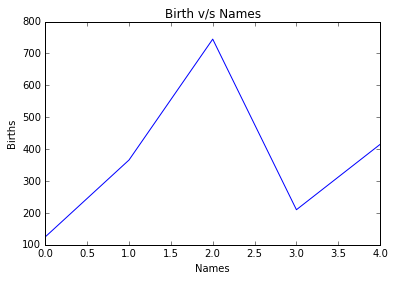

In [289]:
df['Births'].plot()
matplotlib.pyplot.xlabel("Names")
matplotlib.pyplot.ylabel("Births")
matplotlib.pyplot.title("Birth v/s Names")

# Part 2


Now we will create the same dataset but with 1000 rows. We will generate the 1000 rows by randomly repeating the 5 names that we will input at the start using the `random` package.

In [290]:
names = ['Bob', 'Mike', 'Tom', 'Jess', 'Tim']

In [291]:
random.seed(500)
random_names = [names[np.random.randint(low = 0,high = len(names))] for i in range(1000)]

In [292]:
random_names[:10]


['Tom', 'Tom', 'Mike', 'Bob', 'Tom', 'Tom', 'Bob', 'Mike', 'Mike', 'Mike']

In [293]:
# Generate 1000 random numbers between 0 & 100
births = [random.randint(1,100) for i in range(1000)]

In [294]:
BabyDataSet = list(zip(random_names, births))
BabyDataSet[:10]

[('Tom', 80),
 ('Tom', 95),
 ('Mike', 58),
 ('Bob', 26),
 ('Tom', 76),
 ('Tom', 38),
 ('Bob', 81),
 ('Mike', 34),
 ('Mike', 58),
 ('Mike', 80)]

In [295]:
df = pd.DataFrame(BabyDataSet, columns= ['Names', 'Births'])
df.head()

,Names,Births
0,Tom,80
1,Tom,95
2,Mike,58
3,Bob,26
4,Tom,76


In [296]:
# We will now try to find the unique number of names in our dataset
for x in df['Names'].unique():
    print x

Tom
Mike
Bob
Tim
Jess


In [297]:
print(df['Names'].describe())

count     1000
unique       5
top       Mike
freq       218
Name: Names, dtype: object


In [298]:
# Create a groupby object
names = df.groupby('Names')

# Create 
df = names.sum()
df.head()

,Births
Names,
Bob,10360
Jess,8924
Mike,10866
Tim,9711
Tom,10898


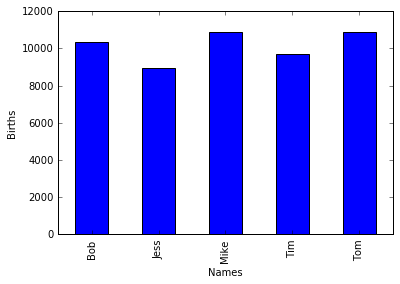

In [299]:
df['Births'].plot.bar()
matplotlib.pyplot.ylabel("Births")

# Part 3

In [300]:
np.random.seed(101)

# We create a function that allows us to create data. 

def createDataSet(Number = 1):
    Output = []
    
    for i in range(Number):
        
        
        # Make a weekly date range
        rng = pd.date_range(start = '1/1/2009', end = '12/31/2012', freq = 'W-MON')
    
        # Create random data
        data = np.random.randint(low = 25, high = 1000, size = len(rng))
    
        # Random statuses
        status = [1,2,3]
    
        # Generating statuses
        random_statuses = [status[np.random.randint(low = 0, high = len(status))] for i in range(len(rng))]
    
        # States
        states = ['NY', 'WA', 'NJ', 'CA', 'FL', 'WI']
        random_states = [states[np.random.randint(low= 0, high = len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_statuses, data, rng))
    
    return Output

In [301]:
# creating the data set
dataset = createDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [302]:

df.head()

,State,Status,CustomerCount,StatusDate
0,WA,1,888,2009-01-05
1,NY,1,548,2009-01-12
2,FL,2,362,2009-01-19
3,NJ,3,863,2009-01-26
4,NJ,3,600,2009-02-02


In [303]:
df.to_csv('Part3.csv', index = False)
df = read_csv('/Users/soutik/Documents/GitHub/Python Scripts/Learning-Python/Part3.csv', index_col='StatusDate')

In [304]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,WA,1,888
2009-01-12,NY,1,548
2009-01-19,FL,2,362
2009-01-26,NJ,3,863
2009-02-02,NJ,3,600


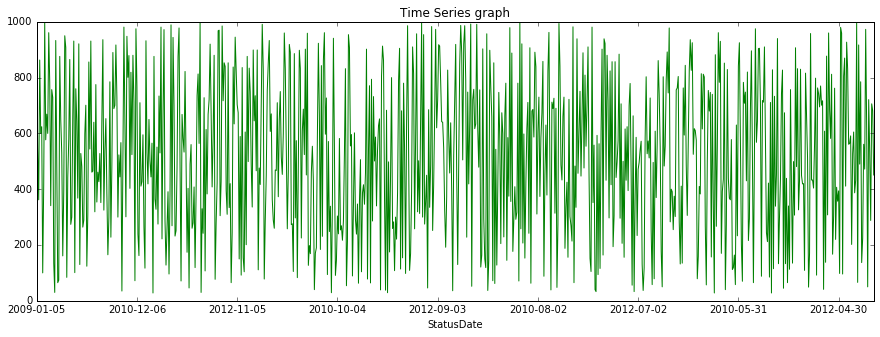

In [305]:
df['CustomerCount'].plot(figsize = (15,5), color = 'green')
matplotlib.pyplot.title("Time Series graph")

In [306]:
df_reset = df.reset_index().groupby(['State', 'StatusDate']).sum()
df_reset.head()

Status  CustomerCount
State StatusDate                       
CA    2009-02-23       3            418
      2009-03-02       1            998
      2009-03-16       2            791
      2009-03-23       3           1356
      2009-03-30       3            961

In [308]:
del df_reset['Status']


KeyError: 'Status'

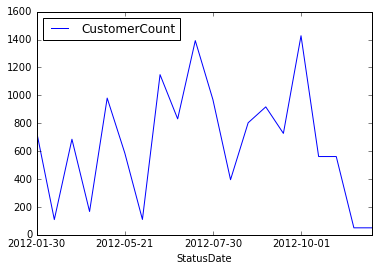

In [352]:
df_reset.loc['CA']['2012':].plot()

2
7
4294967288
3
4294967292


3
1 2 3
3
2
1


SyntaxError: invalid syntax (<ipython-input-563-7346cc2b75ec>, line 1)